In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
import imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC





In [2]:
dataset = pd.read_csv("heartd.csv")

In [3]:
dataset.duplicated().value_counts()

False    918
Name: count, dtype: int64

In [4]:
dataset["HeartDisease"].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [5]:
target = dataset['HeartDisease']

In [6]:
from sklearn.preprocessing import LabelEncoder
labelSex = LabelEncoder()
labelChestPainType = LabelEncoder()
labelRestingECG = LabelEncoder()
labelExerciseAngina = LabelEncoder()
labelST_Slope = LabelEncoder()
dataset['Label Sex'] = labelChestPainType.fit_transform(dataset['Sex'])
dataset['Label ChestPainType'] = labelChestPainType.fit_transform(dataset['ChestPainType'])
dataset['Label RestingECG'] = labelRestingECG.fit_transform(dataset['RestingECG'])
dataset['Label ExerciseAngina'] = labelExerciseAngina.fit_transform(dataset['ExerciseAngina'])
dataset['Label ST_Slope'] = labelST_Slope.fit_transform(dataset['ST_Slope'])
dataset = dataset.drop(['Sex', 'ChestPainType' , 'RestingECG', 'ExerciseAngina', 'ST_Slope'] , axis = 'columns')
dataset['Cholesterol'].replace(['Normal', 'Borderline','High'],
                         [0,1,2], inplace=True)

In [7]:
dataset["Cholesterol"].unique()

array([0, 1, 2], dtype=int64)

In [8]:
# from sklearn.impute import SimpleImputer
# ImputedModule = SimpleImputer(missing_values =0, strategy ='mean')
# x=x.values.reshape(-1,1)
# ImputedX = ImputedModule.fit(x)
# x = ImputedX.transform(x)


In [9]:
dataset["Cholesterol"].unique()

array([0, 1, 2], dtype=int64)

In [10]:
# sns.set()
# dataset.hist(figsize=(10,10))
# plt.show()

In [11]:
# sns.pairplot(dataset,hue='HeartDisease')

In [12]:
# sns.countplot(x='HeartDisease', hue='Age', data=new_dataset)

In [13]:
# sns.countplot(x='HeartDisease', hue='RestingBP', data=new_dataset)

In [14]:
# sns.countplot(x='HeartDisease', hue='Cholesterol', data=new_dataset)

In [15]:
# sns.countplot(x='HeartDisease', hue='FastingBS', data=new_dataset)

In [16]:
# sns.countplot(x='HeartDisease', hue='MaxHR', data=new_dataset)

In [17]:
# sns.countplot(x='HeartDisease', hue='Oldpeak', data=new_dataset)

In [18]:
# sns.countplot(x='HeartDisease', hue='Label Sex', data=new_dataset)

In [19]:
# sns.countplot(x='HeartDisease', hue='Label ChestPainType', data=new_dataset)

In [20]:
# sns.countplot(x='HeartDisease', hue='Label RestingECG', data=new_dataset)

In [21]:
# sns.countplot(x='HeartDisease', hue='Label ExerciseAngina', data=new_dataset)

In [22]:
# sns.countplot(x='HeartDisease', hue='Label ST_Slope', data=new_dataset)

In [23]:
# sns.pairplot(data, hue='HeartDisease')
# plt.show()

In [24]:
dataset.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Label Sex', 'Label ChestPainType', 'Label RestingECG',
       'Label ExerciseAngina', 'Label ST_Slope'],
      dtype='object')

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(dataset.drop('HeartDisease',axis = 1))

StandardScaler()

In [26]:
scaled_features = scaler.transform(dataset.drop('HeartDisease',axis = 1))
x_data = pd.DataFrame(scaled_features,columns = dataset.columns[:-1])
y_data = target
# smote = SMOTE()
# x,y= smote.fit_resample(x_data,y_data)
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
x_data, y_data = rus.fit_resample(x_data, y_data)

In [27]:
y_data.value_counts()

HeartDisease
0    410
1    410
Name: count, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split
x_train_data, x_test_data, y_train_data, y_test_data = train_test_split(x_data, y_data, test_size=0.25, random_state=20,stratify=y_data)

In [29]:
new_df = x_test_data.copy()

new_df['labels'] = y_test_data

In [30]:
new_df.to_csv('heart_test.csv')

In [29]:
y_test_data.value_counts()

1    103
0    102
Name: HeartDisease, dtype: int64

# KNN


In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
from matplotlib import pyplot
error_rate= []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train_data,y_train_data)
    pred_i = knn.predict(x_test_data)
    error_rate.append(np.mean(pred_i != y_test_data))
    print(i,np.mean(pred_i != y_test_data))

1 0.11707317073170732
2 0.18536585365853658
3 0.15609756097560976
4 0.15121951219512195
5 0.15121951219512195
6 0.16097560975609757
7 0.13658536585365855
8 0.16097560975609757
9 0.14634146341463414
10 0.12682926829268293
11 0.13170731707317074
12 0.15121951219512195
13 0.15609756097560976
14 0.17073170731707318
15 0.17073170731707318
16 0.17073170731707318
17 0.15121951219512195
18 0.16585365853658537
19 0.16585365853658537
20 0.1902439024390244
21 0.18048780487804877
22 0.18048780487804877
23 0.18048780487804877
24 0.18536585365853658
25 0.1951219512195122
26 0.1951219512195122
27 0.1902439024390244
28 0.18536585365853658
29 0.1902439024390244
30 0.18048780487804877
31 0.18048780487804877
32 0.18048780487804877
33 0.18048780487804877
34 0.1902439024390244
35 0.1951219512195122
36 0.1951219512195122
37 0.1951219512195122
38 0.1902439024390244
39 0.2


Text(0, 0.5, 'Error Rate')

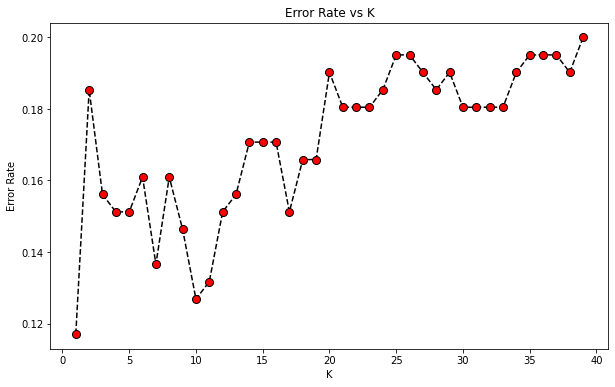

In [32]:
plt.figure(figsize = (10,6))
plt.plot(range(1,40),error_rate,color = 'black',linestyle = '--',marker = 'o',markerfacecolor='red',markersize = 8)
plt.title('Error Rate vs K')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [33]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train_data, y_train_data)
y_pred = classifier.predict(x_test_data)
print(classification_report(y_test_data, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.77      0.84       102
           1       0.81      0.92      0.86       103

    accuracy                           0.85       205
   macro avg       0.86      0.85      0.85       205
weighted avg       0.86      0.85      0.85       205



>2, train: 0.945, test: 0.815,i 2.000 
>3, train: 0.911, test: 0.844,i 3.000 
>4, train: 0.889, test: 0.849,i 4.000 
>5, train: 0.889, test: 0.849,i 5.000 
>6, train: 0.885, test: 0.839,i 6.000 
>7, train: 0.896, test: 0.863,i 7.000 
>8, train: 0.875, test: 0.839,i 8.000 
>9, train: 0.881, test: 0.854,i 9.000 
>10, train: 0.881, test: 0.873,i 10.000 
>11, train: 0.880, test: 0.868,i 11.000 
>12, train: 0.868, test: 0.849,i 12.000 
>13, train: 0.872, test: 0.844,i 13.000 
>14, train: 0.865, test: 0.829,i 14.000 
>15, train: 0.867, test: 0.829,i 15.000 
>16, train: 0.878, test: 0.829,i 16.000 
>17, train: 0.873, test: 0.849,i 17.000 
>18, train: 0.863, test: 0.834,i 18.000 
>19, train: 0.865, test: 0.834,i 19.000 
>20, train: 0.857, test: 0.810,i 20.000 
>21, train: 0.860, test: 0.820,i 21.000 
>22, train: 0.860, test: 0.820,i 22.000 
>23, train: 0.860, test: 0.820,i 23.000 
>24, train: 0.854, test: 0.815,i 24.000 
>25, train: 0.857, test: 0.805,i 25.000 
>26, train: 0.854, test: 0.805,i

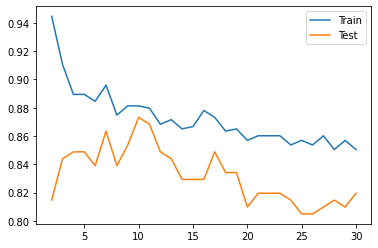

In [34]:
train_scores, test_scores = list(), list()
values = [i for i in range(2, 31)]

for i in values:
	
	modell = KNeighborsClassifier( n_neighbors=i)
	modell.fit(x_train_data, y_train_data)

	train_yhat = modell.predict(x_train_data)
	train_acc = accuracy_score(y_train_data, train_yhat)
	train_scores.append(train_acc)
	
	test_yhat = modell.predict(x_test_data)
	test_acc = accuracy_score(y_test_data, test_yhat)
	test_scores.append(test_acc)
	
	print('>%d, train: %.3f, test: %.3f,i %.3f ' % (i, train_acc, test_acc,i))
	
 
plt.plot(values, train_scores,  label='Train')
plt.plot(values, test_scores,  label='Test')
plt.legend()
plt.show()

# Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier

>2, train: 0.924, test: 0.737,i 2.000 
>3, train: 0.976, test: 0.849,i 3.000 
>4, train: 0.974, test: 0.859,i 4.000 
>5, train: 0.989, test: 0.863,i 5.000 
>6, train: 0.984, test: 0.849,i 6.000 
>7, train: 0.993, test: 0.859,i 7.000 
>8, train: 0.985, test: 0.868,i 8.000 
>9, train: 0.992, test: 0.854,i 9.000 
>10, train: 0.992, test: 0.868,i 10.000 
>11, train: 0.997, test: 0.912,i 11.000 
>12, train: 0.997, test: 0.859,i 12.000 
>13, train: 0.997, test: 0.893,i 13.000 
>14, train: 0.993, test: 0.883,i 14.000 
>15, train: 0.995, test: 0.868,i 15.000 
>16, train: 0.997, test: 0.854,i 16.000 
>17, train: 0.997, test: 0.898,i 17.000 
>18, train: 0.997, test: 0.888,i 18.000 
>19, train: 0.998, test: 0.902,i 19.000 
>20, train: 0.997, test: 0.878,i 20.000 
>21, train: 0.997, test: 0.878,i 21.000 
>22, train: 0.997, test: 0.888,i 22.000 
>23, train: 0.992, test: 0.878,i 23.000 
>24, train: 0.998, test: 0.859,i 24.000 
>25, train: 0.997, test: 0.859,i 25.000 
>26, train: 1.000, test: 0.873,i

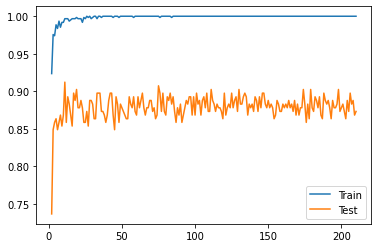

In [36]:
train_scores, test_scores = list(), list()
values = [i for i in range(2, 211)]

for i in values:
	
	modell = RandomForestClassifier( n_estimators=i)
	modell.fit(x_train_data, y_train_data)

	train_yhat = modell.predict(x_train_data)
	train_acc = accuracy_score(y_train_data, train_yhat)
	train_scores.append(train_acc)
	
	test_yhat = modell.predict(x_test_data)
	test_acc = accuracy_score(y_test_data, test_yhat)
	test_scores.append(test_acc)
	
	print('>%d, train: %.3f, test: %.3f,i %.3f ' % (i, train_acc, test_acc,i))
	
 
plt.plot(values, train_scores,  label='Train')
plt.plot(values, test_scores,  label='Test')
plt.legend()
plt.show()

# grid search

# KNN

In [37]:
KNN= KNeighborsClassifier()
param_grid = {'n_neighbors' : np.arange(1,71)}
KNN_model_2 = GridSearchCV(KNN, param_grid, cv=10, scoring='accuracy', return_train_score=True,verbose=3)


In [38]:
KNN_Classifier_2 = KNN_model_2.fit(x_train_data, y_train_data)

Fitting 10 folds for each of 70 candidates, totalling 700 fits
[CV 1/10] END n_neighbors=1;, score=(train=1.000, test=0.871) total time=   0.0s
[CV 2/10] END n_neighbors=1;, score=(train=1.000, test=0.790) total time=   0.0s
[CV 3/10] END n_neighbors=1;, score=(train=1.000, test=0.871) total time=   0.0s
[CV 4/10] END n_neighbors=1;, score=(train=1.000, test=0.855) total time=   0.0s
[CV 5/10] END n_neighbors=1;, score=(train=1.000, test=0.855) total time=   0.0s
[CV 6/10] END n_neighbors=1;, score=(train=1.000, test=0.934) total time=   0.0s
[CV 7/10] END n_neighbors=1;, score=(train=1.000, test=0.787) total time=   0.0s
[CV 8/10] END n_neighbors=1;, score=(train=1.000, test=0.869) total time=   0.0s
[CV 9/10] END n_neighbors=1;, score=(train=1.000, test=0.902) total time=   0.0s
[CV 10/10] END n_neighbors=1;, score=(train=1.000, test=0.754) total time=   0.0s
[CV 1/10] END n_neighbors=2;, score=(train=0.948, test=0.887) total time=   0.0s
[CV 2/10] END n_neighbors=2;, score=(train=0.

In [39]:
KNN_predictions_2 = KNN_Classifier_2.predict(x_test_data)


In [40]:
print(classification_report(y_test_data, KNN_predictions_2))


              precision    recall  f1-score   support

           0       0.91      0.78      0.84       102
           1       0.81      0.92      0.86       103

    accuracy                           0.85       205
   macro avg       0.86      0.85      0.85       205
weighted avg       0.86      0.85      0.85       205



In [41]:
print("Accuracy of scaled data:", accuracy_score(y_test_data, KNN_predictions_2))


Accuracy of scaled data: 0.8536585365853658


In [42]:
print(KNN_model_2.best_params_)

{'n_neighbors': 9}


In [43]:
modelll = KNeighborsClassifier(n_neighbors=14)
modelll.fit(x_train_data, y_train_data)	
test_yhat = modelll.predict(x_test_data)
test_acc = accuracy_score(y_test_data, test_yhat)
print("test  ",test_acc)
train_yhat = modelll.predict(x_train_data)
train_acc = accuracy_score(y_train_data, train_yhat)
print("train  ",train_acc)

test   0.8292682926829268
train   0.865040650406504


# Random Forest

# The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “log_loss” and “entropy” both for the Shannon information gain, see Mathematical formulation. Note: This parameter is tree-specific.

# Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.
#

In [44]:
rf = RandomForestClassifier()
param_grid = { 
    'n_estimators':np.arange(50,200,10),
    'max_depth' : np.arange(10,150,10),
    'min_samples_split':[2, 5, 10],
    'min_samples_leaf':[1, 2, 4],
    'bootstrap':[True, False]
}
RF_model=GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy', return_train_score=True,verbose=3,n_jobs=-1)
RF_Classifier_2 = RF_model.fit(x_train_data, y_train_data) 

Fitting 3 folds for each of 3780 candidates, totalling 11340 fits


KeyboardInterrupt: 

In [ ]:
print(RF_model.best_params_)

{'bootstrap': True, 'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 110}


In [ ]:
RF_predictions_2 = RF_Classifier_2.predict(x_test_data)


In [ ]:
print("Accuracy of unscaled data:", accuracy_score(y_test_data, RF_predictions_2))


Accuracy of unscaled data: 0.8975609756097561


In [ ]:

forest = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, n_iter = 200, cv = 3, verbose=2, random_state=42, n_jobs = -1)
forest.fit(x_train_data, y_train_data)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140]),
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160, 170,
       180, 190])},
                   random_state=42, verbose=2)

In [ ]:
forest.best_params_

{'n_estimators': 190,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 20,
 'bootstrap': True}

In [ ]:

	modell = RandomForestClassifier( bootstrap = True, max_depth= 60, min_samples_leaf= 2, min_samples_split= 5, n_estimators= 60)
	modell.fit(x_train_data, y_train_data)	
	test_yhat = modell.predict(x_test_data)
	test_acc = accuracy_score(y_test_data, test_yhat)
	print(test_acc)
	train_yhat = modell.predict(x_train_data)
	train_acc = accuracy_score(y_train_data, train_yhat)
	print(train_acc)
	

 


0.8682926829268293
0.9479674796747968


# Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
NN_model_2 = MLPClassifier()


In [ ]:
param_grid = { 
    'hidden_layer_sizes':(8,8,8,8),
    'activation' : ['identity','logistic','tanh','relu'],
    'solver' : ['lbfgs', 'sgd','adam'],
    'max_iter' :(np.arange(200,500,50))
   
}

In [ ]:
# ‘lbfgs’ is an optimizer in the family of quasi-Newton methods.
 #‘sgd’ refers to stochastic gradient descent.
#‘adam’ refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy Ba

nn_model=GridSearchCV(estimator=NN_model_2, param_grid=param_grid, cv=4, scoring='accuracy', return_train_score=True,verbose=3,n_jobs=-1)
NN_model_2 = nn_model.fit(x_train_data, y_train_data) 

Fitting 4 folds for each of 288 candidates, totalling 1152 fits


c:\Users\hemoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (450) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
print(NN_model_2.best_params_)

{'activation': 'relu', 'hidden_layer_sizes': 8, 'max_iter': 450, 'solver': 'adam'}


In [ ]:
mlp_predictions_2 = NN_model_2.predict(x_test_data)



In [ ]:
print("Accuracy of scaled data:", accuracy_score(y_test_data, mlp_predictions_2))

Accuracy of scaled data: 0.8048780487804879


### Decision tree 

In [ ]:
classifier_2 = DecisionTreeClassifier( )
param_grid = { 
    'splitter':['best','random'],
    'max_leaf_nodes':  np.arange(2,50),
    'max_depth': np.arange(2,50)
    }
DD_model_2=GridSearchCV(estimator=classifier_2, param_grid=param_grid, cv= 5,return_train_score=True,verbose=3,n_jobs=-1)
DD_Classifier_2 = DD_model_2.fit(x_train_data, y_train_data) 

Fitting 5 folds for each of 4608 candidates, totalling 23040 fits


In [ ]:
DD_Classifier_2_predictions_2 = DD_Classifier_2.predict(x_test_data)


In [ ]:
print("Accuracy of unscaled data:", accuracy_score(y_test_data, DD_Classifier_2_predictions_2))

Accuracy of unscaled data: 0.8536585365853658


In [ ]:
forest2 = RandomizedSearchCV(estimator = classifier_2, param_distributions = param_grid, n_iter = 200, cv = 3, verbose=2, random_state=42, n_jobs = -1)
forest2.fit(x_train_data, y_train_data)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                                        'max_leaf_nodes': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                                        'splitter': ['best', 'random']},
                   random_state=42, verbose=2)

In [ ]:
forest2.best_params_

{'splitter': 'random', 'max_leaf_nodes': 42, 'max_depth': 16}

In [ ]:

	modell = DecisionTreeClassifier( splitter ='random', max_leaf_nodes= 33, max_depth= 30)
	modell.fit(x_train_data, y_train_data)	
	test_yhat = modell.predict(x_test_data)
	test_acc = accuracy_score(y_test_data, test_yhat)
	print("test  " ,test_acc)
	train_yhat = modell.predict(x_train_data)
	train_acc = accuracy_score(y_train_data, train_yhat)
	print("train  ",train_acc)
	

 


test   0.848780487804878
train   0.9170731707317074


 # ensamble

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier

In [ ]:
log = LogisticRegression()
rnd = RandomForestClassifier(bootstrap = True, max_depth= 60, min_samples_leaf= 2, min_samples_split= 5, n_estimators= 60)
svm = SVC()

In [ ]:
voting = VotingClassifier(
    estimators=[('logistics_regression', log), ('random_forest', rnd), ('support_vector_machine', svm)],
    voting='hard' , weights=[1,1,1] )

In [ ]:
voting.fit(x_train_data, y_train_data)

VotingClassifier(estimators=[('logistics_regression', LogisticRegression()),
                             ('random_forest',
                              RandomForestClassifier(max_depth=60,
                                                     min_samples_leaf=2,
                                                     min_samples_split=5,
                                                     n_estimators=60)),
                             ('support_vector_machine', SVC())],
                 weights=[1, 1, 1])

In [ ]:
for clf in (log, rnd, svm, voting):
    clf.fit(x_train_data, y_train_data)
    y_pred = clf.predict(x_test_data)
    print(clf.__class__.__name__, accuracy_score(y_test_data, y_pred))

LogisticRegression 0.8292682926829268
RandomForestClassifier 0.8682926829268293
SVC 0.8439024390243902
VotingClassifier 0.8585365853658536


# LogisticRegression

In [ ]:
LogisticRegressionModel = LogisticRegression(solver='sag',C=1.0,random_state=33,max_iter=10000)

LogisticRegressionModel_1=LogisticRegressionModel.fit(x_train_data, y_train_data)



In [ ]:
print('LogisticRegressionModel Train Score is : ' , LogisticRegressionModel_1.score(x_train_data, y_train_data))
print('LogisticRegressionModel Test Score is : ' , LogisticRegressionModel_1.score(x_test_data, y_test_data))
print('LogisticRegressionModel Classes are : ' , LogisticRegressionModel_1.classes_)
print('LogisticRegressionModel No. of iteratios is : ' , LogisticRegressionModel_1.n_iter_)
print('----------------------------------------------------')




LogisticRegressionModel Train Score is :  0.8422764227642277
LogisticRegressionModel Test Score is :  0.8292682926829268
LogisticRegressionModel Classes are :  [0 1]
LogisticRegressionModel No. of iteratios is :  [28]
----------------------------------------------------


## SVC

In [ ]:
mrange = list(np.arange(0.5, 10.5, 0.5))
mrange.append(0.1)
mrange.sort()
mrange = np.array(mrange)
mrange

In [53]:
# mrange = np.arange(0, 10.5, 0.5)
# mrange = np.arange(1, 11)

param_grid = {'C': mrange,
              'gamma': mrange,
            #   'degree': np.arange(1,6),
              'kernel': ['poly','linear','sigmoid','rbf']} 
  
svc_grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
svc_grid.fit(x_train_data, y_train_data)

Fitting 5 folds for each of 1764 candidates, totalling 8820 fits
[CV 1/5] END .......C=0.0, gamma=0.0, kernel=poly;, score=nan total time=   0.0s
[CV 2/5] END .......C=0.0, gamma=0.0, kernel=poly;, score=nan total time=   0.0s
[CV 3/5] END .......C=0.0, gamma=0.0, kernel=poly;, score=nan total time=   0.0s
[CV 4/5] END .......C=0.0, gamma=0.0, kernel=poly;, score=nan total time=   0.0s
[CV 5/5] END .......C=0.0, gamma=0.0, kernel=poly;, score=nan total time=   0.0s
[CV 1/5] END .....C=0.0, gamma=0.0, kernel=linear;, score=nan total time=   0.0s
[CV 2/5] END .....C=0.0, gamma=0.0, kernel=linear;, score=nan total time=   0.0s
[CV 3/5] END .....C=0.0, gamma=0.0, kernel=linear;, score=nan total time=   0.0s
[CV 4/5] END .....C=0.0, gamma=0.0, kernel=linear;, score=nan total time=   0.0s
[CV 5/5] END .....C=0.0, gamma=0.0, kernel=linear;, score=nan total time=   0.0s
[CV 1/5] END ....C=0.0, gamma=0.0, kernel=sigmoid;, score=nan total time=   0.0s
[CV 2/5] END ....C=0.0, gamma=0.0, kernel=si

c:\Users\omarr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
820 fits failed out of a total of 8820.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
420 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\omarr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\omarr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py", line 237, in fit
    raise ValueError(msg)
ValueError: gamma value must be > 0; 0.0 is invalid. Use a positive number or use 'auto' to set gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ]),
                         'gamma': array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ]),
                         'kernel': ['poly', 'linear', 'sigmoid', 'rbf']},
             verbose=3)

In [54]:
print(f"Best Parameters: {svc_grid.best_params_} with best score {svc_grid.best_score_}")

Best Parameters: {'C': 1.0, 'gamma': 0.5, 'kernel': 'rbf'} with best score 0.8682926829268294


In [55]:
svc_train_grid = svc_grid.predict(x_train_data)
svc_pred_grid = svc_grid.predict(x_test_data)

In [56]:
print(classification_report(y_train_data,svc_train_grid))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       308
           1       0.97      0.98      0.98       307

    accuracy                           0.98       615
   macro avg       0.98      0.98      0.98       615
weighted avg       0.98      0.98      0.98       615



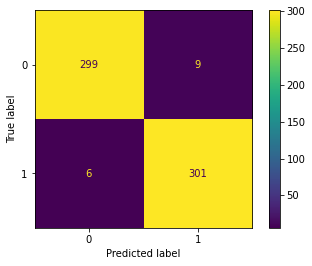

In [59]:
# type = df.TYPE.value_counts().index.values
# type = ["ALLERGY", "COLD", "COVID", "FLU"]
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_train_data,svc_train_grid)
                                    , display_labels=svc_grid.classes_)
cm_display.plot()
plt.show()

In [60]:
print(classification_report(y_test_data,svc_pred_grid))

              precision    recall  f1-score   support

           0       0.96      0.84      0.90       102
           1       0.86      0.96      0.91       103

    accuracy                           0.90       205
   macro avg       0.91      0.90      0.90       205
weighted avg       0.91      0.90      0.90       205



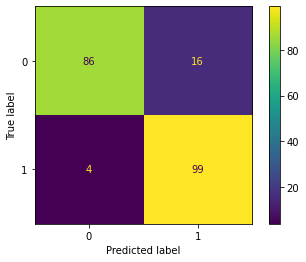

In [61]:
# type = df.TYPE.value_counts().index.values
# type = ["ALLERGY", "COLD", "COVID", "FLU"]
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test_data,svc_pred_grid), 
                                    display_labels=svc_grid.classes_)
cm_display.plot()
plt.show()